# Вариант 1

$x_1, . . . , x_n \sim N(a, \sigma^2)$

В первом пункте нужно продемонстрировать состоятельность выборочной дисперсии по определению (ис-
пользуя определение состоятельной оценки). Состоятельной оценка называется тогда, когда стремится по вероятности к правильному значению.

Формула выборочной дисперсии: $S_{n}^{2}={\frac  {1}{n}}\sum \limits _{{i=1}}^{n}\left(X_{i}-{\bar  {X}}\right)^{2}={\frac  {1}{n}}\sum \limits _{{i=1}}^{n}X_{i}^{2}-\left({\frac  {1}{n}}\sum \limits _{{i=1}}^{n}X_{i}\right)^{2}$

In [67]:
import statistics
import numpy as np
from scipy.stats import norm, chi2
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
#функция подсчета выборочной дисперсии
def sample_variance(sample):
    return np.mean(np.square(sample)) - np.mean(sample)**2

In [39]:
#нахождение зависимости расхождения генеральной и выборочной зависимости для n от 1 до 10000
a = np.random.uniform(-100, 100)
sigma = np.random.uniform(1, 100)
N = range(1, 10000)
error_per_n = []
sample2 = []
for n in N:
    sample2 += [np.random.normal(a, sigma, 1)]
    error_per_n.append(abs(sigma**2 - sample_variance(sample2)))

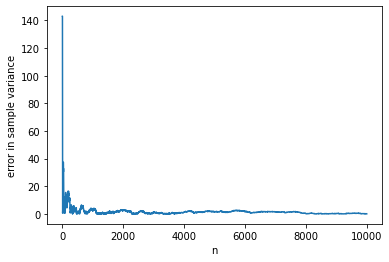

In [40]:
plt.plot(N, error_per_n)
plt.ylabel("error in sample variance")
plt.xlabel("n")
plt.show()

На графике видно, что при увеличении n выборочная дисперсия стремится к генеральной.

Во втором пункте нужно продемонстрировать, что выборочная дисперсия нормального распределения имеет
распределение хи-квадрат: $n\frac{\bar s_n }{\sigma^2} \sim \chi^2(n-1)$

In [42]:
def get_frac(sample, sigma):
    return len(sample) * sample_variance(sample) / sigma**2

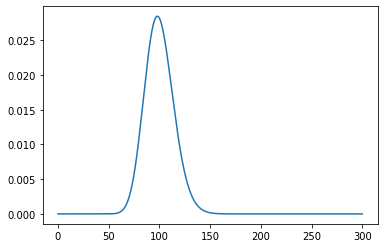

In [88]:
#график хи-квадрат для k=100
X = np.arange(0, 300, 0.1)
Y_chi2_100 = [chi2.pdf(x, 100) for x in X]
plt.plot(X, Y_chi2_100)
plt.show()

<AxesSubplot:ylabel='Density'>

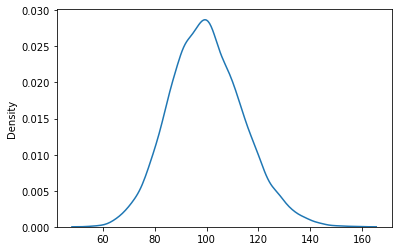

In [92]:
#распределение выборочных дисперсий для выборок с n=k+1=101
n = 101
sigma = np.random.uniform(1, 100)
fracs = []
for _ in range(10000):
    sample = np.random.normal(a, sigma, n)
    fracs.append(get_frac(sample, sigma))
sns.kdeplot(fracs, cumulative=False)

C:\Users\anna_\anaconda3\envs\m\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Density'>

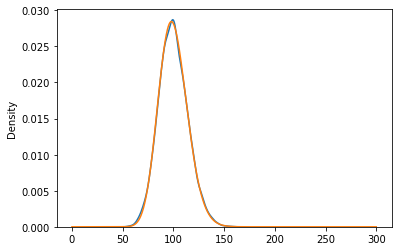

In [93]:
#сопоставление предыдущих двух графиков
sns.kdeplot(fracs, cumulative=False)
sns.lineplot(X, Y_chi2_100)

Для k=100 видно, что распределение эмперических дисперсий практически совпадает с распределением хи-квадрат

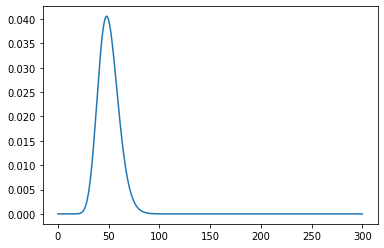

In [94]:
#график хи-квадрат для k=50
X = np.arange(0, 300, 0.1)
Y_chi2_50 = [chi2.pdf(x, 50) for x in X]
plt.plot(X, Y_chi2_50)
plt.show()

<AxesSubplot:ylabel='Density'>

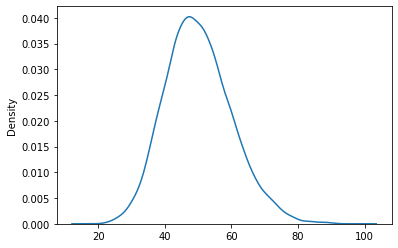

In [95]:
#распределение выборочных дисперсий для выборок с n=k+1=51
n = 51
sigma = np.random.uniform(1, 100)
fracs2 = []
for _ in range(10000):
    sample = np.random.normal(a, sigma, n)
    fracs2.append(get_frac(sample, sigma))
sns.kdeplot(fracs2, cumulative=False)

C:\Users\anna_\anaconda3\envs\m\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Density'>

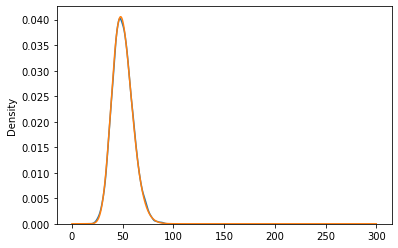

In [96]:
#сопоставление графиков для k=50 
sns.kdeplot(fracs2, cumulative=False)
sns.lineplot(X, Y_chi2_50)

Для k=50 на графике так же видно, что распределение эмпирической дисперсии практически совпадает с распределением хи-квадрат

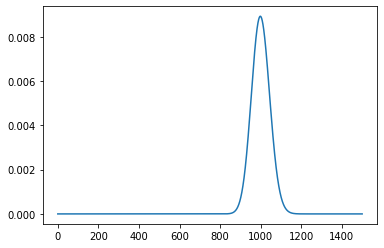

In [103]:
#график хи-квадрат для k=1000
X = np.arange(0, 1500, 0.1)
Y_chi2_1000 = [chi2.pdf(x, 1000) for x in X]
plt.plot(X, Y_chi2_1000)
plt.show()

<AxesSubplot:ylabel='Density'>

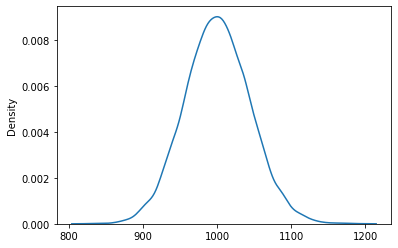

In [101]:
#распределение выборочных дисперсий для выборок с n=k+1=1001
n = 1001
sigma = np.random.uniform(1, 100)
fracs3 = []
for _ in range(10000):
    sample = np.random.normal(a, sigma, n)
    fracs3.append(get_frac(sample, sigma))
sns.kdeplot(fracs3, cumulative=False)

C:\Users\anna_\anaconda3\envs\m\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Density'>

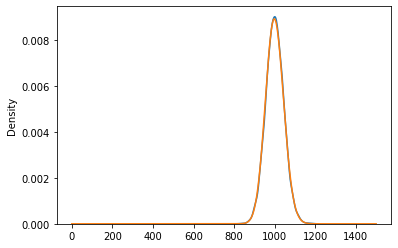

In [104]:
#сопоставление графиков для k=1000
sns.kdeplot(fracs3, cumulative=False)
sns.lineplot(X, Y_chi2_1000)

Здесь также видно, что графики распределений совпадают